In [1]:
import numpy as np
from fsspec.implementations.local import LocalFileSystem
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
%matplotlib inline

In [2]:
from llcreader import llcmodel
import importlib
llcmodel = importlib.reload(llcmodel)

In [3]:
from llcreader import stores
stores = importlib.reload(stores)

In [4]:
fs = LocalFileSystem()
path = '/Users/rpa/Code/llcreader/global_oce_llc90/hFacC.data'
dtype = np.dtype('>f4')
nk = 50
nx = 90

In [5]:
store = stores.BaseStore(fs, base_path='/Users/rpa/Code/llcreader/global_oce_llc90')
store

In [6]:
model = llcmodel.LLC90Model(store)
ds_faces = model.get_dataset(['T', 'S', 'Eta'],
                             k_levels=[0, 2, 5, 6, 7],
                             k_chunksize=3)
ds_faces

<xarray.Dataset>
Dimensions:  (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 5, k_l: 5, k_p1: 5, k_u: 5, time: 2)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 2 5 6 7
  * k_u      (k_u) int64 0 2 5 6 7
  * k_l      (k_l) int64 0 2 5 6 7
  * k_p1     (k_p1) int64 0 2 5 6 7
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 1948-01-01T12:00:00 1948-01-01T20:00:00
Data variables:
    T        (time, k, face, j, i) >f4 dask.array<shape=(2, 5, 13, 90, 90), chunksize=(1, 3, 3, 90, 90)>
    S        (time, k, face, j, i) >f4 dask.array<shape=(2, 5, 13, 90, 90), chunksize=(1, 3, 3, 90, 90)>
    Eta      (time, face, j, i)

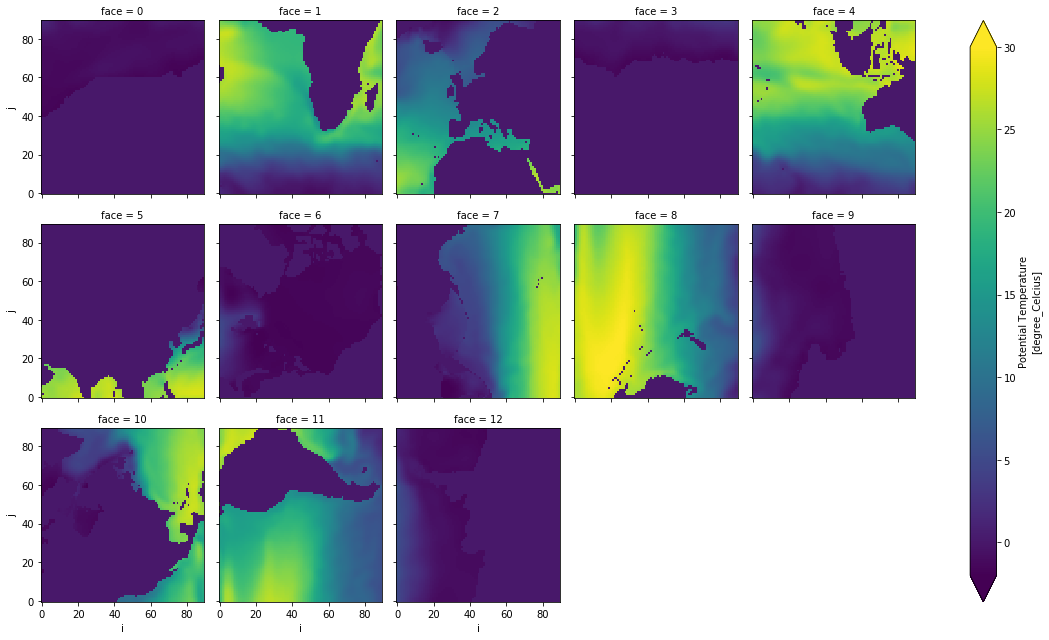

In [7]:
ds_faces.T[1, 3].load().plot(col='face', col_wrap=5, vmin=-2, vmax=30)

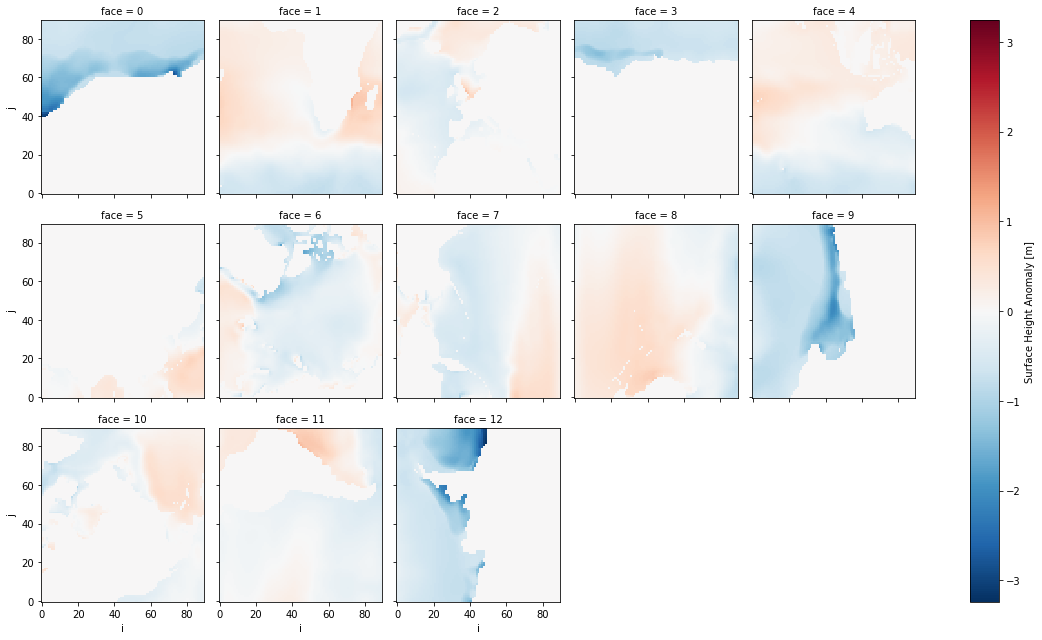

In [8]:
ds_faces.Eta[1].load().plot(col='face', col_wrap=5)

In [9]:
llcmodel = importlib.reload(llcmodel)
model = llcmodel.LLC90Model(store)
ds_latlon = model.get_dataset(['T', 'S', 'U', 'V', 'W', 'Eta'], type='latlon',
                             k_levels=[0, 2, 5, 6, 7],
                             k_chunksize=3)
ds_latlon

[('U', 'V')]


<xarray.Dataset>
Dimensions:  (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 5, k_l: 5, k_p1: 5, k_u: 5, time: 2)
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * k_u      (k_u) int64 0 2 5 6 7
  * k_l      (k_l) int64 0 2 5 6 7
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k_p1     (k_p1) int64 0 2 5 6 7
  * k        (k) int64 0 2 5 6 7
  * time     (time) datetime64[ns] 1948-01-01T12:00:00 1948-01-01T20:00:00
Data variables:
    T        (time, k, j, i) >f4 dask.array<shape=(2, 5, 270, 360), chunksize=(1, 3, 270, 90)>
    S        (time, k, j, i) >f4 dask.array<shape=(2, 5, 270, 360), chunksize=(1, 3, 270, 90)>
    U        (time, k, j, i_g) >f4 dask.array<shape=(2, 5, 270, 360), chunk

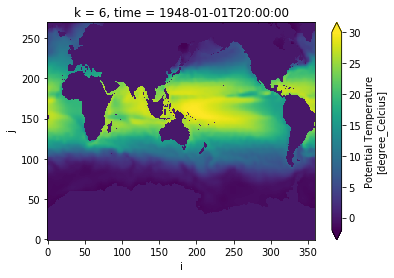

In [10]:
ds_latlon.T[1, 3].load().plot(vmin=-2, vmax=30)

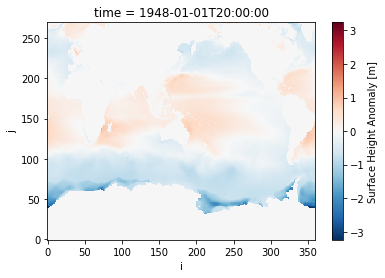

In [11]:
ds_latlon.Eta[1].load().plot()

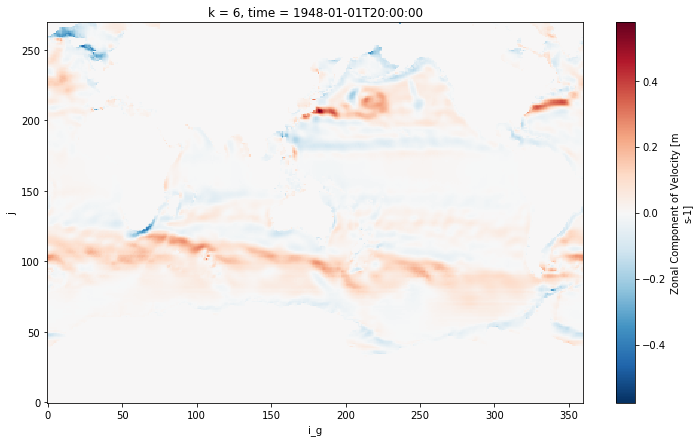

In [12]:
ds_latlon.U[1, 3].load().plot(figsize=(12, 7))

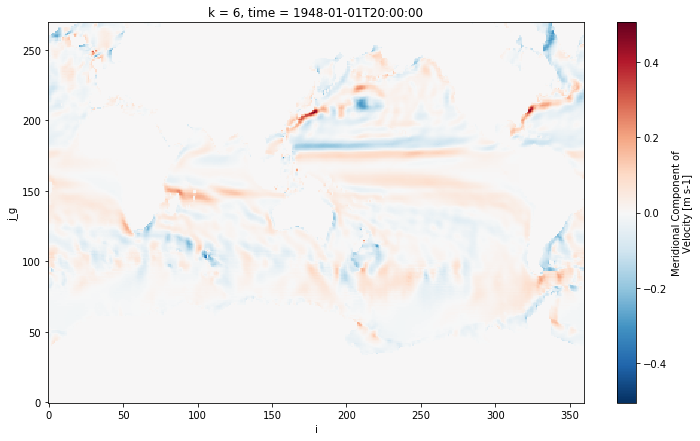

In [13]:
ds_latlon.V[1, 3].load().plot(figsize=(12, 7))